In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spa
import scipy.sparse.linalg as spalg
from mpl_toolkits import mplot3d

In [60]:
N = 100
M = 100
dx = 1/float(N)
dy = 1/float(M)
A_diag = np.eye(N-1)*(-2.0/(dx**2)-2.0/(dy**2))
A_diag = A_diag + np.diag(np.ones((1,N-2))[0], 1)/(dx**2) + np.diag(np.ones((1,N-2))[0],-1)/(dx**2)

In [61]:
np.ones((1,N-2)).shape

(1, 98)

In [62]:
A_diag

array([[-40000.,  10000.,      0., ...,      0.,      0.,      0.],
       [ 10000., -40000.,  10000., ...,      0.,      0.,      0.],
       [     0.,  10000., -40000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -40000.,  10000.,      0.],
       [     0.,      0.,      0., ...,  10000., -40000.,  10000.],
       [     0.,      0.,      0., ...,      0.,  10000., -40000.]])

In [63]:
A_off = np.eye(N-1)/(dx**2)

In [64]:
A = np.zeros(((N-1)*(N-1),(N-1)*(N-1)))

In [65]:
A.shape

(9801, 9801)

In [66]:
for i in range(0,N-1): 
    A[i*(N-1):i*(N-1)+(N-1),i*(N-1):i*(N-1)+(N-1)] = A_diag

In [67]:
for i in range(1, N-1):
    A[(i-1)*(N-1):(i-1)*(N-1)+(N-1),i*(N-1):i*(N-1)+(N-1)] = A_off
    A[i*(N-1):i*(N-1)+(N-1),(i-1)*(N-1):(i-1)*(N-1)+(N-1)] = A_off

In [68]:
f = np.ones((1,(N-1)*(N-1))).T

In [85]:
A_spar = spa.csc_matrix(A)
u_spar = spalg.spsolve(-A_spar,f)

In [86]:
u_spar.shape

(9801,)

In [87]:
u = np.linalg.solve(-A,f)

In [89]:
u_new = np.reshape(u,((N-1), (N-1)))

In [82]:
u.shape

(9801, 1)

In [47]:
x = np.arange(0,u_new.shape[1])
y = np.arange(0,u_new.shape[0])
X,Y = np.meshgrid(x,y)

In [90]:
u_newspar = np.reshape(u_spar,((N-1), (N-1)))

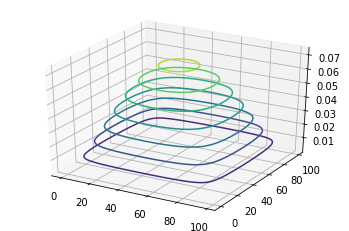

In [91]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,u_newspar)